# Practical 1

## Aim : You need to use employees Attrition data set to predict whether the employee leave the company or not. for this compare the best algorithm Logistics Regrssion, Decision Tree, Knn Neighbour , Random forest, navie base.

In [1]:
# importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\AML\Datasets\HR_Attrition.csv")  #import the dataset

In [3]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.isnull().sum()  #checking null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.duplicated().sum()  #checking duplicate values

0

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
fig = plt.figure(figsize = (40,20) , dpi = 500) # Finding correlation between the columns
sns.heatmap(df.corr(),annot = True) #pearson correlation
plt.show()

In [9]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [10]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [11]:
col = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Attrition'],axis=1),df['Attrition'],test_size = 0.2,random_state=0)

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder  # encoding

In [14]:
ct = ColumnTransformer([("ohe",OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),col)])  #transforming columns

In [15]:
x_train_ohe = ct.fit_transform(x_train)  #spliting train test dataset
x_test_ohe = ct.transform(x_test)

In [16]:
sc= StandardScaler()  #scaling
x_train_sc = sc.fit_transform(x_train_ohe)
x_test_sc = sc.transform(x_test_ohe)

In [17]:
le = LabelEncoder()  #encoding
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

In [18]:
accuracy = []  #finding the accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,metric='minkowski').fit(x_train_sc,y_train_le)
    y_pred_knn = knn.predict(x_test_sc)
    accuracy.append(accuracy_score(y_test_le,y_pred_knn))
    

Text(0.5, 0, 'k- value')

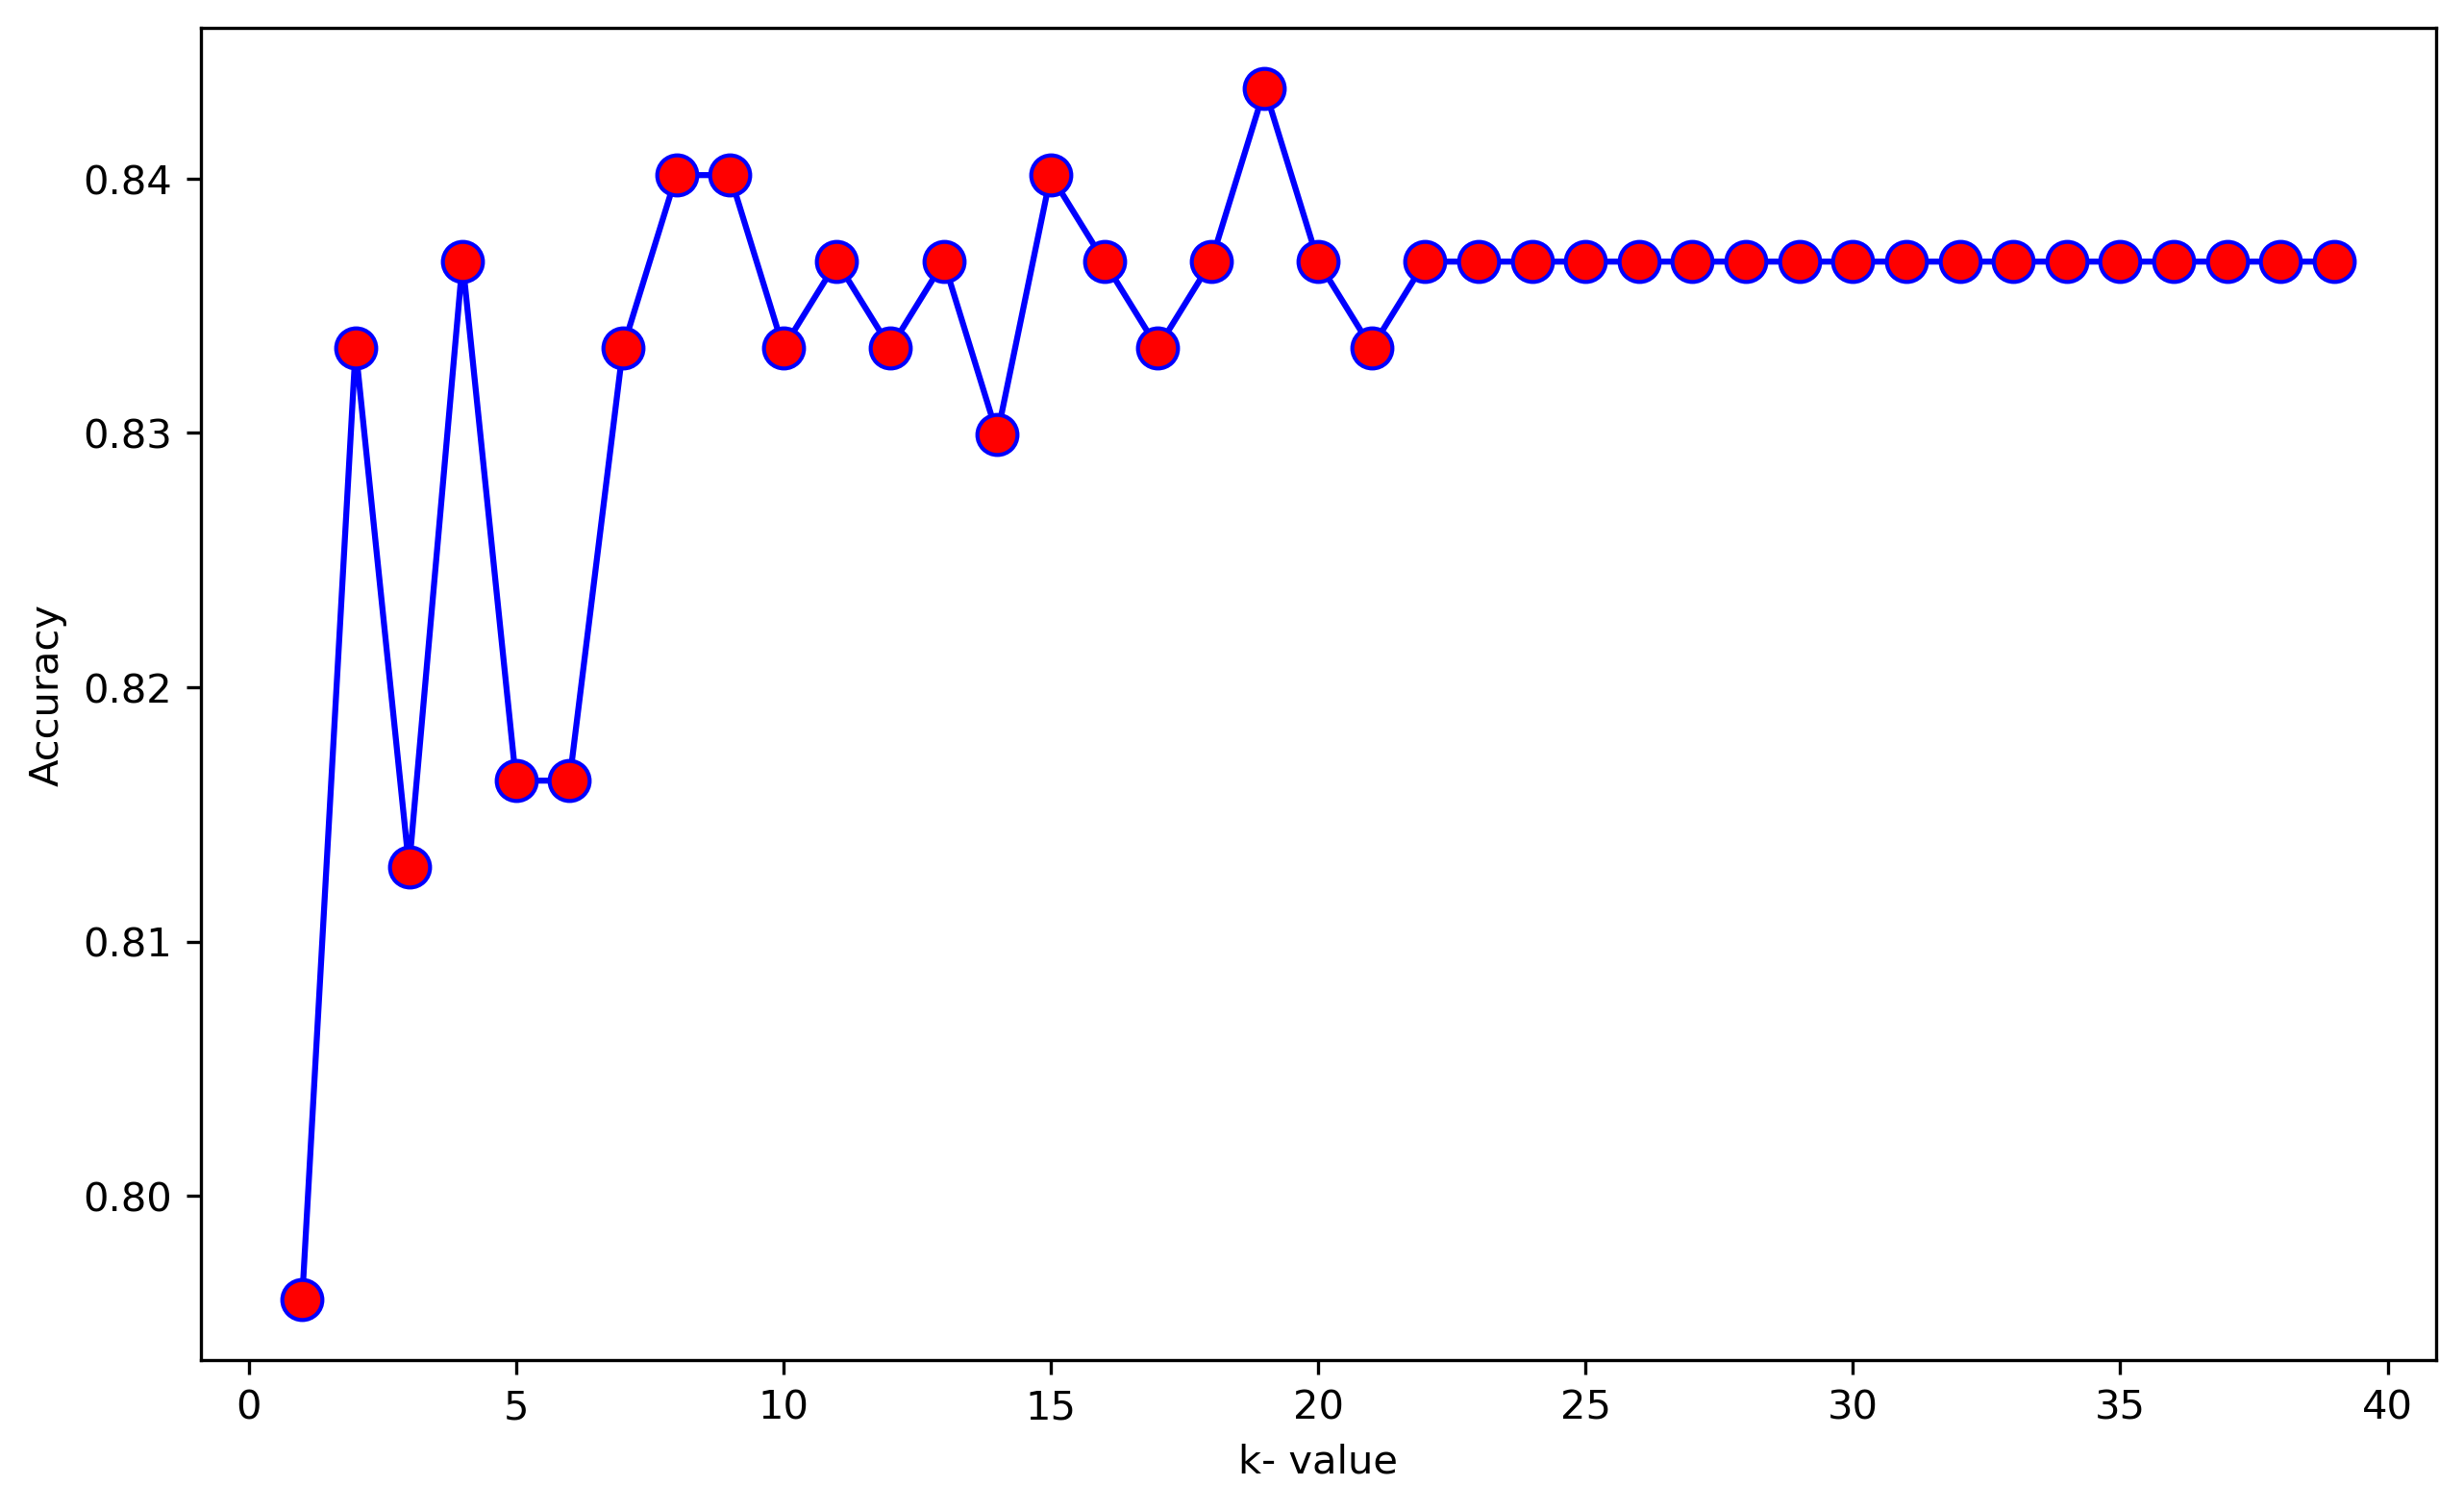

In [19]:
plt.figure(figsize=(10,6), dpi = 300)
plt.plot(range(1,40),accuracy,'b-', marker='o',markersize=10,markerfacecolor='red')
plt.ylabel("Accuracy")
plt.xlabel("k- value")

In [20]:
def algo(x_train,x_test,y_train,y_test):
    
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred_lr = lr.predict(x_test)
    
    from sklearn.tree import DecisionTreeClassifier
    dt = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=5)
    dt.fit(x_train,y_train)
    y_pred_dt = dt.predict(x_test)
    
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(x_train,y_train)
    y_pred_rf = rf.predict(x_test)
    
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb.fit(x_train,y_train)
    y_pred_nb = nb.predict(x_test)
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import accuracy_score
    knn = KNeighborsClassifier(n_neighbors=19 ,metric='minkowski').fit(x_train_sc,y_train_le)
    y_pred_knn = knn.predict(x_test_sc)
    
    
    alg = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN Classifier'] 
    x=0
    for i in [y_pred_lr,y_pred_dt,y_pred_rf,y_pred_nb,y_pred_knn]:
      print('#'*40)
      print(" "*8,alg[x])
      print('#'*40)
      from sklearn.metrics import classification_report
      print(classification_report(y_test,i))
      x+=1
    

In [21]:
algo(x_train_sc,x_test_sc,y_train_le,y_test_le)

########################################
         Logistic Regression
########################################
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       245
           1       0.56      0.18      0.28        49

    accuracy                           0.84       294
   macro avg       0.71      0.58      0.59       294
weighted avg       0.81      0.84      0.80       294

########################################
         Decision Tree
########################################
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       245
           1       0.50      0.31      0.38        49

    accuracy                           0.83       294
   macro avg       0.69      0.62      0.64       294
weighted avg       0.81      0.83      0.82       294

########################################
         Random Forest
########################################
              precision  

## Conclusion
Logistic regression model accuracy(in %) : 84 <br>
Decision Tree Classfier model accuracy(in %) : 83<br>
Random Forest Classfier model accuracy(in %) : 82<br>
Navie base model accuracy(in %) : 65<br>
Knn Neighbour model accuracy(in %) : 84<br>
So the best alogrithm for this dataset is Knn Neighbour model and logistic regression because it has highest accuracy score